In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


In [2]:
input_digits = pd.read_csv('./data/digit-recognizer/train.csv')

In [17]:
test_input_digits = pd.read_csv('./data/digit-recognizer/test.csv')

In [3]:
print('Shape of input data :',input_digits.shape)
print('Columns in Input data :',input_digits.columns)

Shape of input data : (42000, 785)
Columns in Input data : Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [20]:
print('Shape of test input data :',test_input_digits.shape)
print('Columns in test Input data :',test_input_digits.columns)

Shape of test input data : (28000, 784)
Columns in test Input data : Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)


In [4]:
X_train = input_digits.iloc[:,1:785]
Y_train = input_digits['label']

In [19]:
X_test = test_input_digits.iloc[:,1:785]

In [5]:
print('X Train shape :',X_train.shape)
print('X Train Columns :',X_train.columns)
print('Y Train shape :',Y_train.shape)
# print('Y Train Columns :',Y_train.columns)

X Train shape : (42000, 784)
X Train Columns : Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)
Y Train shape : (42000,)


In [6]:
# Convert label to one hot encoder
num_classes = 10
y_train = keras.utils.to_categorical(Y_train,num_classes)
print("One hot encoded Vecots:\n",y_train[:5])

One hot encoded Vecots:
 [[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [7]:
from keras.layers import Dense #Dense layers are 'fully connected' layers
from keras.models import Sequential 

image_size = 784
num_classes = 10

model = Sequential()
#The input layer input shape should match the shape of our training data hence input_shape
model.add(Dense(units =32,activation='sigmoid',input_shape=(image_size,)))
model.add(Dense(units=num_classes,activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [9]:
#converting dataframe to numpy array
x_train = X_train.values

In [12]:
model.compile(optimizer="sgd",loss="categorical_crossentropy",
              metrics=['accuracy'])
history = model.fit(x_train,y_train, batch_size=128, epochs=5, 
                    verbose=False, validation_split =.1)
loss, accuracy = model.evaluate(x_train, y_train, verbose=False)

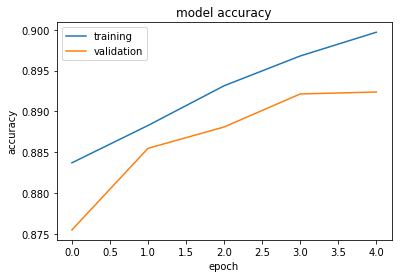

Test loss: 0.419
Test accuracy: 0.9


In [14]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'], loc='best')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [23]:
# Functions to reduce re-writing code
def create_dense(layer_sizes):
    model = Sequential()
    model.add(Dense(layer_sizes[0],activation='sigmoid',
                    input_shape=(image_size,)))
    
    for s in layer_sizes[1:]:
        model.add(Dense(units = s, activation='sigmoid'))
        
    model.add(Dense(units=num_classes,activation='softmax'))
    return model

In [34]:
def evaluate(model, batch_size=128,epochs=5):
    model.summary()
    model.compile(optimizer='sgd', loss='categorical_crossentropy',
                 metrics=['accuracy'])
    history = model.fit(x_train, y_train, batch_size=batch_size,
                        epochs=epochs, validation_split=.1, verbose=False)
    loss, accuracy = model.evaluate(x_train, y_train, verbose=False)
    
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training','validation'], loc='best')
    plt.show()
    
    print()
    print(f'Test loss: {loss:.3}')
    print(f'Test accuracy: {accuracy:.3}')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_28 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


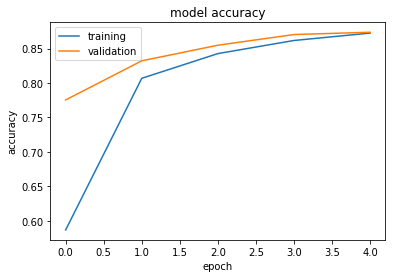


Test loss: 0.563
Test accuracy: 0.877
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_29 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_30 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_31 (Dense)             (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


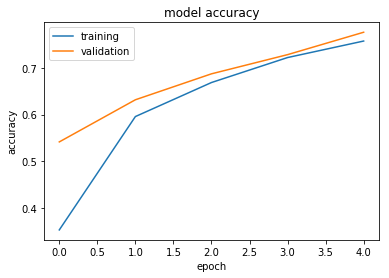


Test loss: 1.34
Test accuracy: 0.775
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_33 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_34 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_35 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


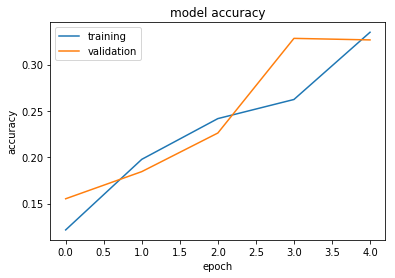


Test loss: 2.21
Test accuracy: 0.318
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_36 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_37 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_38 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_39 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_40 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


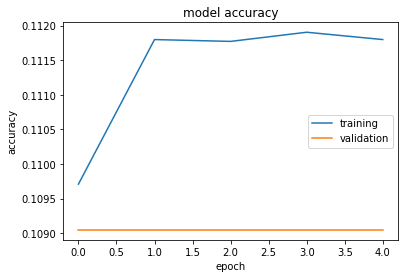


Test loss: 2.3
Test accuracy: 0.112


In [35]:
for layers in range(1,5):
    model = create_dense([32] * layers)
    evaluate(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_41 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_42 (Dense)             (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


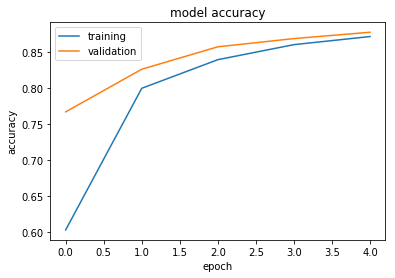


Test loss: 0.577
Test accuracy: 0.879
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_43 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_44 (Dense)             (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


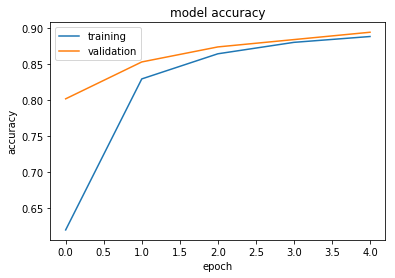


Test loss: 0.431
Test accuracy: 0.896
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_46 (Dense)             (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


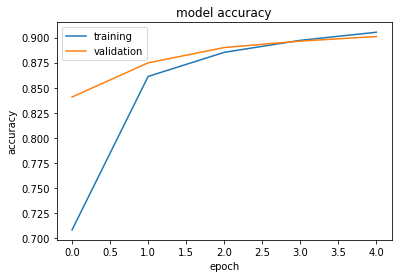


Test loss: 0.352
Test accuracy: 0.91
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_47 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_48 (Dense)             (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


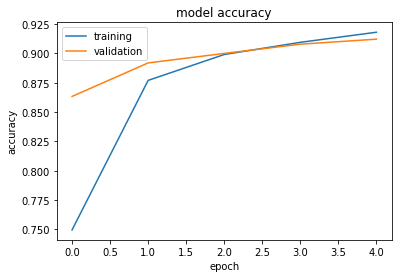


Test loss: 0.296
Test accuracy: 0.922
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_49 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_50 (Dense)             (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


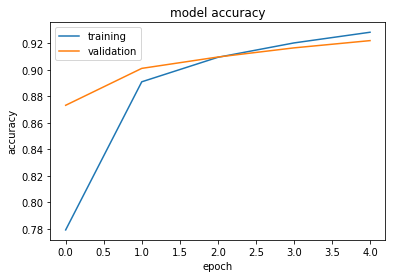


Test loss: 0.251
Test accuracy: 0.934
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 1024)              803840    
_________________________________________________________________
dense_52 (Dense)             (None, 10)                10250     
Total params: 814,090
Trainable params: 814,090
Non-trainable params: 0
_________________________________________________________________


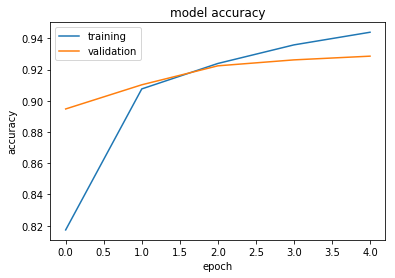


Test loss: 0.201
Test accuracy: 0.949
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_53 (Dense)             (None, 2048)              1607680   
_________________________________________________________________
dense_54 (Dense)             (None, 10)                20490     
Total params: 1,628,170
Trainable params: 1,628,170
Non-trainable params: 0
_________________________________________________________________


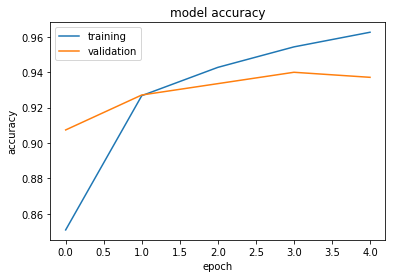


Test loss: 0.149
Test accuracy: 0.965


In [36]:
for nodes in [32,64,128,256,512,1024,2048]:
    model = create_dense([nodes])
    evaluate(model)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_55 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_56 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_57 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_58 (Dense)             (None, 10)                330       
Total params: 27,562
Trainable params: 27,562
Non-trainable params: 0
_________________________________________________________________


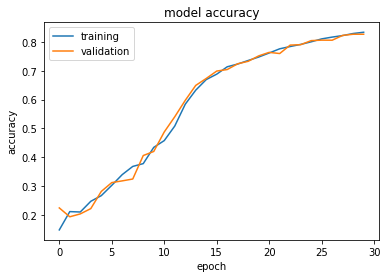


Test loss: 0.772
Test accuracy: 0.832
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_59 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_60 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_61 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_62 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_63 (Dense)             (None, 10)                330       
Total params: 28,618
Trainable params: 28,618
Non-trainable params: 0
_________________________________________________________________


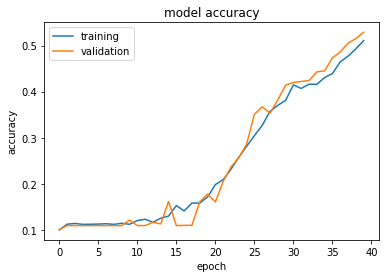


Test loss: 1.47
Test accuracy: 0.516
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_64 (Dense)             (None, 32)                25120     
_________________________________________________________________
dense_65 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_66 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_67 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_68 (Dense)             (None, 32)                1056      
_________________________________________________________________
dense_69 (Dense)             (None, 10)                330       
Total params: 29,674
Trainable params: 29,674
Non-trainable params: 0
__________________________________

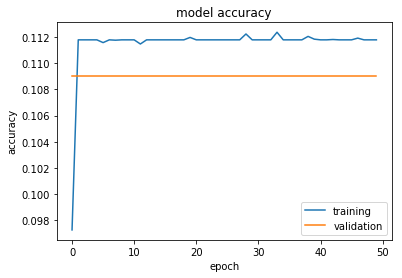


Test loss: 2.29
Test accuracy: 0.112
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_70 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_71 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_72 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_73 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


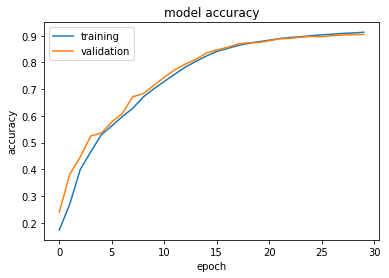


Test loss: 0.343
Test accuracy: 0.914
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_74 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_75 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_76 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_77 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_78 (Dense)             (None, 10)                1290      
Total params: 151,306
Trainable params: 151,306
Non-trainable params: 0
_________________________________________________________________


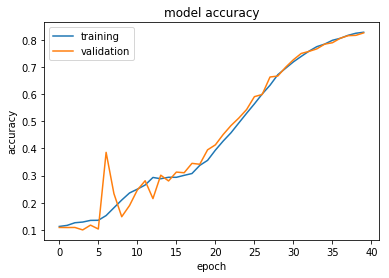


Test loss: 0.737
Test accuracy: 0.833
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_79 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_80 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_81 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_82 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_83 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_84 (Dense)             (None, 10)                1290      
Total params: 167,818
Trainable params: 167,818
Non-trainable params: 0
_______________________________

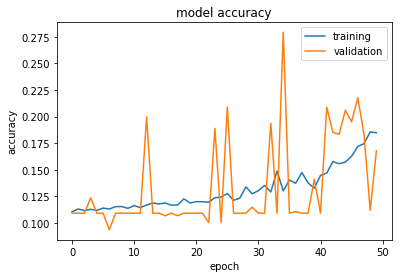


Test loss: 2.27
Test accuracy: 0.176
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_85 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_86 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_87 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_88 (Dense)             (None, 10)                5130      
Total params: 932,362
Trainable params: 932,362
Non-trainable params: 0
_________________________________________________________________


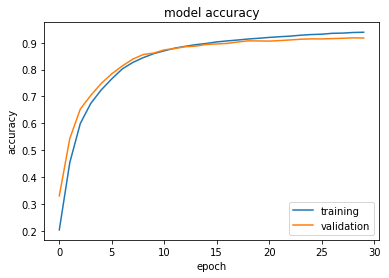


Test loss: 0.225
Test accuracy: 0.939
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_89 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_90 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_91 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_92 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_93 (Dense)             (None, 10)                5130      
Total params: 1,195,018
Trainable params: 1,195,018
Non-trainable params: 0
_________________________________________________________________


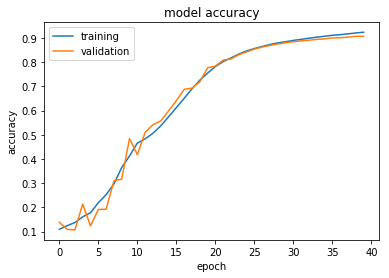


Test loss: 0.302
Test accuracy: 0.923
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_94 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_95 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_96 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_97 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_98 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_99 (Dense)             (None, 10)                5130      
Total params: 1,457,674
Trainable params: 1,457,674
Non-trainable params: 0
___________________________

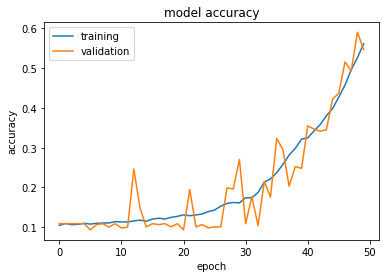


Test loss: 1.29
Test accuracy: 0.549


In [37]:
for nodes_per_layer in [32,128,512]:
    for layers in [3,4,5]:
        model = create_dense([nodes_per_layer] * layers)
        evaluate(model, epochs=10*layers)

# Reference
https://medium.com/tebs-lab/how-to-classify-mnist-digits-with-different-neural-network-architectures-39c75a0f03e3